<a href="https://colab.research.google.com/github/jshinm/code_bucket/blob/main/CNN_TransferLearning_XRay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="BrainMachineIcon" height="45px" src="https://www.pngfind.com/pngs/m/360-3602228_mdico-hospital-doentes-e-etc-chest-x-ray.png" align="left" hspace="10px" vspace="0px"></p> 

<h1> Hello there, welcome to Lab 6 of EN.520.659! </h1>

In this lab, we will learn to classify 7 diseases using NIH Chest X-Ray dataset by

- training Convolutional Neural Network (CNN)
- doing transfer learning using pre-trained models and fine tuning the last layers.



We will be using the [NIH ChestX-Ray dataset](https://nihcc.app.box.com/v/ChestXray-NIHCC). For details about the dataset, please read the [documentation](https://nihcc.app.box.com/v/ChestXray-NIHCC/file/220660789610) or the [paper](https://scholar.google.com/scholar_url?url=http://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf&hl=en&sa=T&oi=gsb-gga&ct=res&cd=0&d=5116144877511284006&ei=e_xIYPe5DY6OmgGbzbeADA&scisig=AAGBfm0_PEwK4KScCr3pItHF2EQQ322Qqg) : Wang, Xiaosong, et al. "Chestx-ray8: Hospital-scale chest x-ray database and benchmarks on weakly-supervised classification and localization of common thorax diseases." Proceedings of the IEEE conference on computer vision and pattern recognition. 2017.


<br> For a short summary, the dataset provides  of 14 Common Thorax Disease Categories with multi-class labels which have been mined from the associated radiological reports using natural language processing. 

The dataset comprises of 112,120 frontal-view X-ray images of 30,805 unique patients and comes in multiple parts. To keep training times in check, we will  only be using only the first tarball [`images_01.tar.gz`](https://nihcc.app.box.com/v/ChestXray-NIHCC/file/219764235225)

The keys to the whole dataset are in the [csv file from the dataset](https://nihcc.app.box.com/v/ChestXray-NIHCC/file/219760887468). 

Download these two files and upload them to your Google Drive.


## Library imports


In [1]:
import pandas as pd
from glob import glob
import os
import sys
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # additional plotting functionality
from sklearn.model_selection import train_test_split # Train test split

# Image plots related
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

import random # For randomizing

In [2]:
# custom import
from tqdm.notebook import tqdm
import numpy as np

## Part I
Read the dataset and get consider only top 7 frequently occuring labels

### Task 1:
Mount Google Drive [2 points]

In [3]:
# YOUR CODE HERE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Task 2 :  
Load csv file `Data_Entry_2017_v2020.csv` given by dataset to dataframe `df_data` [2 points]

In [4]:
# global variables
MYPATH = '/content/drive/MyDrive/JHU_NDD/XRAYdataset/'
FILECSV = 'Data_Entry_2017_v2020.csv'
FILETAR = 'images_001.tar.gz'
NEWPATH = 'images'

In [5]:
# YOUR CODE HERE
df_data = pd.read_csv(MYPATH + FILECSV) #reading csv files
print(df_data.shape)
df_data.head()

(112120, 11)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


### Task 3: 
Construct a dataframe `df_images` of images `.png` available [3 points]

In [6]:
# YOUR CODE HERE
# extracting tarball
import tarfile

tar = tarfile.open(MYPATH + FILETAR, "r:gz")
tar.extractall('.')
tar.close()

In [7]:
flist = []
for dirpath,dirnames,files in os.walk(NEWPATH): #getting a list of files in a dataframe
    flist.append(files)

df_images = pd.DataFrame(np.array(flist).T, columns=['Image Index'])
df_images

,Image Index
0,00000963_016.png
1,00000988_000.png
2,00000623_000.png
3,00001247_010.png
4,00000915_006.png
...,...
4994,00001286_004.png
4995,00001122_008.png
4996,00000444_000.png
4997,00000566_005.png


### Task 4: 
Merge the previous two dataframes to get `df_merged`.

> ⏩ Hint: You should have 4999 rows in `df_merged` [2 points]

In [8]:
# YOUR CODE HERE
df_merged = df_data.merge(df_images) #merging two dataframes to find intersection
df_merged

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
4994,00001335_002.png,No Finding,2,1335,18,F,PA,2048,2500,0.168,0.168
4995,00001335_003.png,No Finding,3,1335,19,F,PA,2048,2500,0.168,0.168
4996,00001335_004.png,No Finding,4,1335,19,F,PA,2992,2991,0.143,0.143
4997,00001335_005.png,No Finding,5,1335,22,F,PA,2946,2948,0.143,0.143


### Task 5: 
Get unique labels and count of number of images per label. Plot the count of top 20 labels most frequently occuring labels as bar plot. <br>

Please note that the dataset has multiple labels per image (eg: `Consolidation|Infiltration`) and just to avoid complications for the sake of the lab, there is no need to split the labels. So here, an example having label `Consolidation|Infiltration` would be considered as a seperate class.  [5 points]

In [9]:
# YOUR CODE HERE
top20 = df_data[['Finding Labels']].value_counts(ascending=False)[:20] #getting a list of unique labels and their quantities
top20

Finding Labels                   
No Finding                           60361
Infiltration                          9547
Atelectasis                           4215
Effusion                              3955
Nodule                                2705
Pneumothorax                          2194
Mass                                  2139
Effusion|Infiltration                 1603
Atelectasis|Infiltration              1350
Consolidation                         1310
Atelectasis|Effusion                  1165
Pleural_Thickening                    1126
Cardiomegaly                          1093
Emphysema                              892
Infiltration|Nodule                    829
Atelectasis|Effusion|Infiltration      737
Fibrosis                               727
Edema                                  628
Cardiomegaly|Effusion                  484
Consolidation|Infiltration             441
dtype: int64

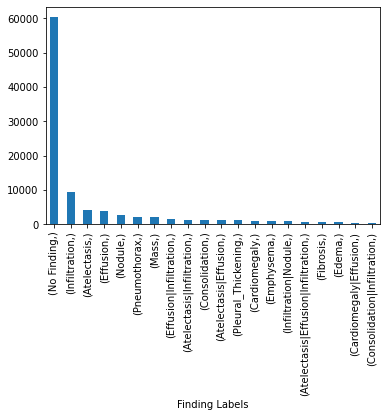

In [10]:
pd.DataFrame(top20).plot.bar(legend=False); #bar plots for the top 20 labels

❓ QUESTION ❓
Are the class labels in the dataset balanced?

No, the class labels in the dataset are not balanced as it can be seen from the plot

⚠️ If you check the number of unique patient IDs, we will find that lot of x-rays belong to the same patient. We are not considering an unbiased split in our lab as we are not using full dataset, but it is important to note that this will bias the training. Also we are considering both "PA" and "AP" views of X-Rays due to limited data size. Please not that this not ideal and advisable.

### Task 6: 
For sake of conciseness, we will be only using the 7 classes that most frequently. Filter the dataframe to include only those classes. You will note that the top 7 labels are single labels [10 points]

In [11]:
# YOUR CODE HERE
top7_labels = [i[0] for i in top20.index.to_numpy()][:7] #getting a list for the top 7 most frequently occurring labels
top7_labels

['No Finding',
 'Infiltration',
 'Atelectasis',
 'Effusion',
 'Nodule',
 'Pneumothorax',
 'Mass']

In [12]:
top7 = pd.DataFrame(top7_labels, columns=['Finding Labels'])
df_top7 = df_merged.merge(top7) #finding the intersect to filter for the top 7 labels
df_top7

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
1,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168,0.168
2,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168
3,00000005_002.png,No Finding,2,5,69,F,AP,2500,2048,0.168,0.168
4,00000005_003.png,No Finding,3,5,69,F,PA,2992,2991,0.143,0.143
...,...,...,...,...,...,...,...,...,...,...,...
3770,00001194_000.png,Pneumothorax,0,1194,38,M,AP,2500,2048,0.168,0.168
3771,00001194_005.png,Pneumothorax,5,1194,41,M,PA,2462,2677,0.143,0.143
3772,00001202_004.png,Pneumothorax,4,1202,50,F,PA,2986,2991,0.143,0.143
3773,00001248_036.png,Pneumothorax,18,1248,33,F,PA,2992,2991,0.143,0.143


### Task 7:
By plotting you will find that one class has too many samples. Randomly choose only 500 samples for that class [10 points]




In [13]:
# YOUR CODE HERE
largest = top7.iloc[0][0]
largebool = df_top7['Finding Labels'] == largest #select for the most frequently occurring label
df_top7_equal = df_top7[largebool].sample(500).append(df_top7[~largebool]) #randomly choose 500 samples
df_top7_equal = df_top7_equal.reset_index(drop=True) #reset indices
df_top7_equal

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00001007_004.png,No Finding,1,1007,51,F,AP,3056,2544,0.139,0.139
1,00000542_001.png,No Finding,1,542,52,F,PA,2992,2991,0.143,0.143
2,00000500_000.png,No Finding,7,500,78,F,PA,2992,2991,0.143,0.143
3,00000633_000.png,No Finding,0,633,57,F,PA,2682,2991,0.143,0.143
4,00000413_000.png,No Finding,0,413,42,M,PA,2500,2048,0.171,0.171
...,...,...,...,...,...,...,...,...,...,...,...
1516,00001194_000.png,Pneumothorax,0,1194,38,M,AP,2500,2048,0.168,0.168
1517,00001194_005.png,Pneumothorax,5,1194,41,M,PA,2462,2677,0.143,0.143
1518,00001202_004.png,Pneumothorax,4,1202,50,F,PA,2986,2991,0.143,0.143
1519,00001248_036.png,Pneumothorax,18,1248,33,F,PA,2992,2991,0.143,0.143


## Part II
Split into train-validation-test set and data visualization

### Task 8: 
Split into train-validation-test set randomly. You can use sklearn inbuilt function `train_test_split` [4 points]

In [64]:
# YOUR CODE HERE
X = df_top7_equal['Image Index']
y = df_top7_equal['Finding Labels']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42) #train test split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state=42) #train val split

In [65]:
X_train.shape, X_val.shape, X_test.shape #dim of the train, val, test sets

((855,), (285,), (381,))

### Task 9:
Plot class distribution (both actual counts and as percentage of total data) as barplot for each of train, test and validation sets [3 points]

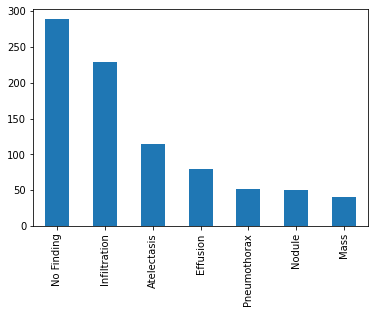

In [16]:
# YOUR CODE HERE
y_train.value_counts().plot.bar() #actual counts for train

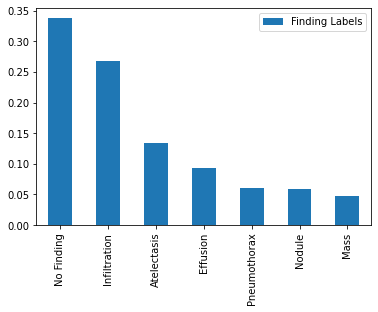

In [17]:
pd.DataFrame(y_train.value_counts()).apply(lambda x: x/x.sum()).plot.bar() #percent counts for train

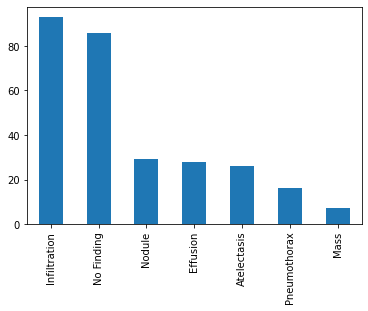

In [18]:
y_val.value_counts().plot.bar() #actual counts for val

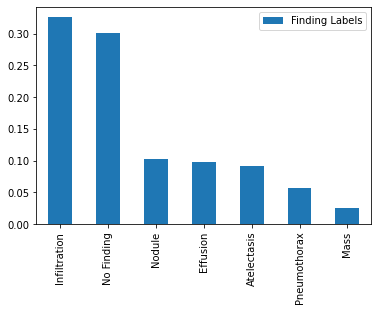

In [19]:
pd.DataFrame(y_val.value_counts()).apply(lambda x: x/x.sum()).plot.bar() #percent counts for val

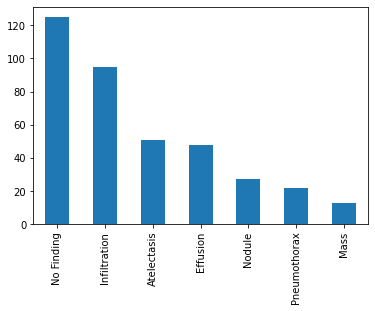

In [20]:
y_test.value_counts().plot.bar() #actual counts for test

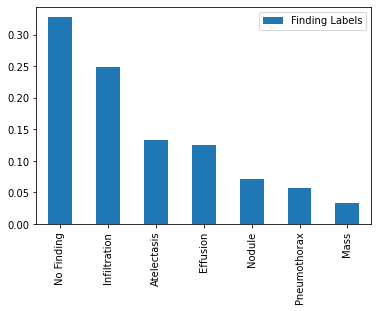

In [21]:
pd.DataFrame(y_test.value_counts()).apply(lambda x: x/x.sum()).plot.bar() #percent counts for test

### Task 10
Look at some training images with true labels. Plot random 5 images per class and observe. 
> ⏩ Hint: Use `cmap='bone'` for matplotlib's imshow to show images likes x-rays  [15 points]

In [22]:
top7_labels

['No Finding',
 'Infiltration',
 'Atelectasis',
 'Effusion',
 'Nodule',
 'Pneumothorax',
 'Mass']

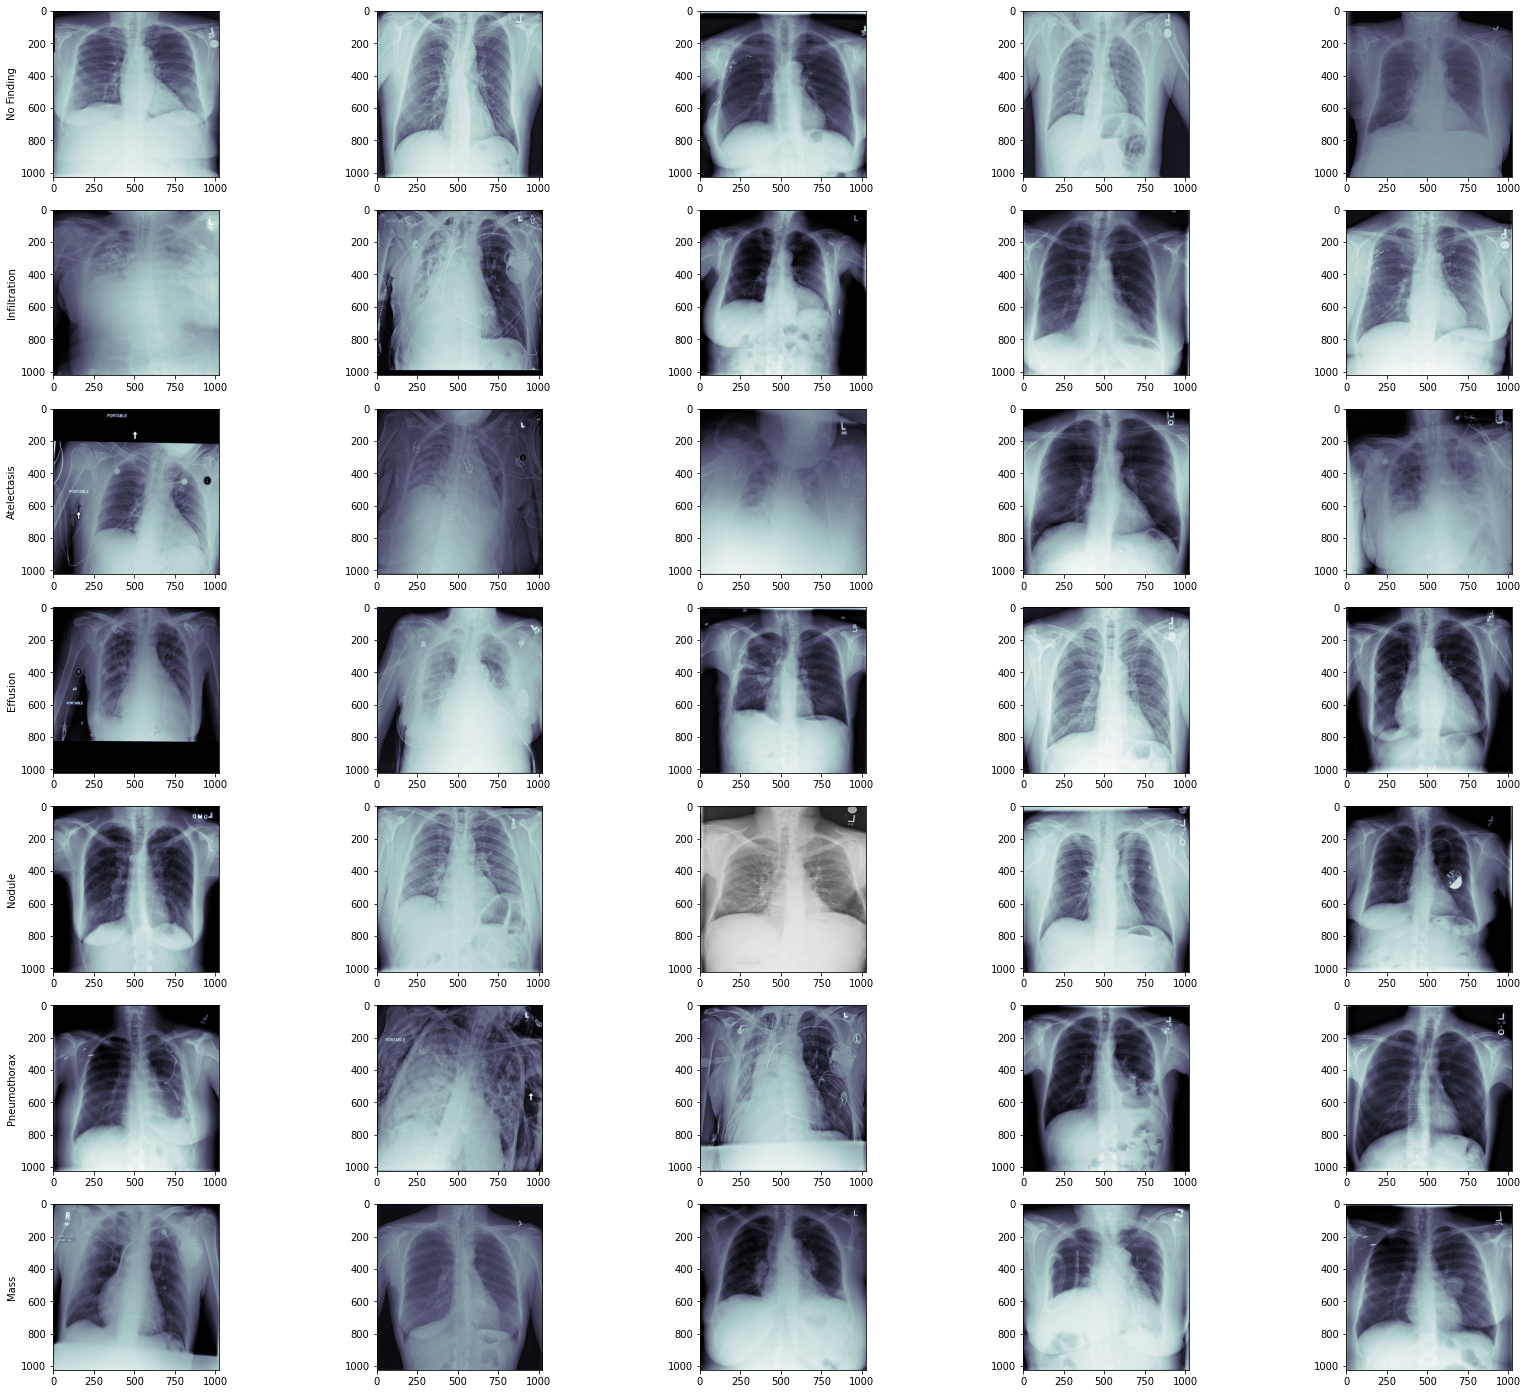

In [24]:
#7 by 5 grid that outputs images from training dataset
fig, axs = plt.subplots(7, 5, figsize=(4*7,5*5))

for i, feat in enumerate(top7_labels):
    idx = y_train.loc[y_train == feat].index[:5] #get only the top five indices
    axs[i,0].set_ylabel(feat)
    for j, id in enumerate(idx):
        path = NEWPATH + '/' + X_train[id]
        temp = plt.imread(path) #must read the image before passing it to imshow
        axs[i,j].imshow(temp, cmap='bone') #cmap changed for xray images

## Part III
Train a CNN to do classification. You refer to Lab 4 for code and ideas.

### Task 11:


Train a convolutional neural network using keras.

You will need to use keras dataloaders as the entire data cannot be loaded into the memory at once. Make sure you mean and variance normalize the data inside the dataloader function. You will also need to re-size the images to make it fit in Colab memory. <br>

> ⏩ Hint: Relevant functions :  <br>
Image generator: `from keras_preprocessing.image import ImageDataGenerator` <br>
`ImageDataGenerator.flow_from_dataframe()`
 https://keras.io/api/preprocessing/image/#flowfromdataframe-method


Show performance using accuracy (obtained from keras) and plotting confusion matrix <br>
> ⏩ Hint: You may want to use functions `from sklearn.metrics import confusion_matrix` , `from sklearn.metrics import classification_report`


[20 points]

In [190]:
#imports for keras and sklearn
from keras_preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, ReLU # https://keras.io/api/layers/convolution_layers/convolution1d/
from keras.regularizers import L1, L2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [124]:
# SHORT (INCOMPLETE) EXAMPLE FOR DATALOADER USING DATAFRAME IN KERAS

# Redefine generator to include pre-processing function
BS = 40 #batch size

datagen = ImageDataGenerator(rescale=1./255) #normalize

#constructing train,val,test generator from the dataframe as the image cannot fit at once
train_generator = datagen.flow_from_dataframe(pd.concat([X_train,y_train],axis=1), directory=NEWPATH, x_col='Image Index', y_col='Finding Labels', class_mode='categorical', batch_size=BS, shuffle=False)
val_generator = datagen.flow_from_dataframe(pd.concat([X_val,y_val],axis=1), directory=NEWPATH, x_col='Image Index', y_col='Finding Labels', class_mode='categorical', batch_size=BS, shuffle=False)
test_generator = datagen.flow_from_dataframe(pd.concat([X_test,y_test],axis=1), directory=NEWPATH, x_col='Image Index', y_col='Finding Labels', class_mode='categorical', batch_size=BS, shuffle=False)

Found 855 validated image filenames belonging to 7 classes.
Found 285 validated image filenames belonging to 7 classes.
Found 381 validated image filenames belonging to 7 classes.


Batch Dimension for X: (40, 256, 256, 3)
Batch Dimension for y: (40, 7)
One Hot Label: [1. 0. 0. 0. 0. 0. 0.]


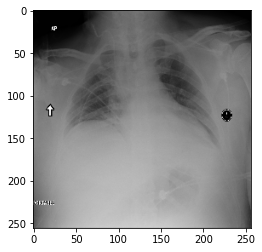

In [207]:
for i, j in train_generator:
    print(f'Batch Dimension for X: {i.shape}')
    print(f'Batch Dimension for y: {j.shape}')
    print(f'One Hot Label: {j[0]}')
    plt.imshow(i[0], cmap='bone')    
    break

In [208]:
# Custom CNN Model (There are 3 Conv-MaxPool operations)
model = Sequential()
model.add(Conv2D(256, (5), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (5), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(16, (5), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(7, activation='softmax', kernel_regularizer=L2(0.02), bias_regularizer=L2(0.02), activity_regularizer=L2(0.02)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [133]:
model.fit(x=train_generator,validation_data=val_generator,verbose=1, epochs=15)

Epoch 1/15
22/22 [==============================] - 18s 834ms/step - loss: 1.7200 - accuracy: 0.3380 - val_loss: 1.7143 - val_accuracy: 0.3018
Epoch 2/15
22/22 [==============================] - 18s 809ms/step - loss: 1.7195 - accuracy: 0.3462 - val_loss: 1.7315 - val_accuracy: 0.3228
Epoch 3/15
22/22 [==============================] - 18s 810ms/step - loss: 1.6926 - accuracy: 0.3649 - val_loss: 1.6868 - val_accuracy: 0.3754
Epoch 4/15
22/22 [==============================] - 18s 799ms/step - loss: 1.6762 - accuracy: 0.3684 - val_loss: 1.7715 - val_accuracy: 0.3684
Epoch 5/15
22/22 [==============================] - 18s 813ms/step - loss: 1.6634 - accuracy: 0.3778 - val_loss: 1.7169 - val_accuracy: 0.3719
Epoch 6/15
22/22 [==============================] - 18s 810ms/step - loss: 1.6321 - accuracy: 0.3871 - val_loss: 1.7119 - val_accuracy: 0.3474
Epoch 7/15
22/22 [==============================] - 18s 809ms/step - loss: 1.6062 - accuracy: 0.3942 - val_loss: 1.6746 - val_accuracy: 0.3368

In [209]:
model.fit(x=train_generator,validation_data=val_generator,verbose=1, epochs=15)

Epoch 1/15
22/22 [==============================] - 19s 837ms/step - loss: 2.2450 - accuracy: 0.2852 - val_loss: 2.0137 - val_accuracy: 0.3018
Epoch 2/15
22/22 [==============================] - 18s 809ms/step - loss: 1.9505 - accuracy: 0.3236 - val_loss: 1.9393 - val_accuracy: 0.3018
Epoch 3/15
22/22 [==============================] - 18s 809ms/step - loss: 1.8772 - accuracy: 0.3168 - val_loss: 1.8666 - val_accuracy: 0.3018
Epoch 4/15
22/22 [==============================] - 18s 802ms/step - loss: 1.8392 - accuracy: 0.3406 - val_loss: 1.8856 - val_accuracy: 0.3228
Epoch 5/15
22/22 [==============================] - 18s 811ms/step - loss: 1.7954 - accuracy: 0.3584 - val_loss: 1.8670 - val_accuracy: 0.3228
Epoch 6/15
22/22 [==============================] - 18s 810ms/step - loss: 1.8113 - accuracy: 0.3361 - val_loss: 1.7331 - val_accuracy: 0.3544
Epoch 7/15
22/22 [==============================] - 18s 813ms/step - loss: 1.7376 - accuracy: 0.3723 - val_loss: 1.8060 - val_accuracy: 0.3614

In [134]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, None, None, 256)   19456     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, None, None, 256)   0         
_________________________________________________________________
dropout_14 (Dropout)         (None, None, None, 256)   0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, None, None, 64)    409664    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, None, None, 64)    0         
_________________________________________________________________
dropout_15 (Dropout)         (None, None, None, 64)    0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, None, None, 16)  

In [210]:
_, acc = model.evaluate(test_generator, verbose=True)
print(f'Test Accuracy: {acc * 100}')

10/10 [==============================] - 6s 534ms/step - loss: 1.8819 - accuracy: 0.3438
Test Accuracy: 34.383201599121094


In [211]:
y_hat = np.argmax(model.predict(test_generator, verbose=True), axis=-1)
y_hat

10/10 [==============================] - 6s 550ms/step


array([2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4,
       2, 2, 4, 4, 4, 4, 2, 2, 4, 1, 4, 2, 2, 2, 4, 4, 2, 4, 4, 0, 4, 2,
       4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 1, 0, 4, 2, 4, 2, 4, 4, 4, 2,
       4, 4, 2, 2, 2, 4, 4, 4, 4, 0, 4, 4, 0, 4, 2, 4, 4, 4, 2, 4, 4, 2,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 3, 2, 2, 4, 4,
       4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 1, 2, 4, 3, 2, 4, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 1, 4, 4, 1, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 2, 2, 0, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2,
       4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 5,
       2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4,
       2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4,

In [212]:
confusion_matrix(test_generator.labels, y_hat)

array([[ 0,  0, 19,  1, 31,  0,  0],
       [ 0,  0, 18,  0, 30,  0,  0],
       [ 1,  4, 38,  1, 50,  1,  0],
       [ 0,  1,  1,  0, 11,  0,  0],
       [ 3,  0, 54,  0, 68,  0,  0],
       [ 0,  0, 10,  0, 17,  0,  0],
       [ 1,  0, 14,  0,  7,  0,  0]])

In [213]:
print(classification_report(test_generator.labels, y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.00      0.00      0.00        48
           2       0.25      0.40      0.31        95
           3       0.00      0.00      0.00        13
           4       0.32      0.54      0.40       125
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        22

    accuracy                           0.28       381
   macro avg       0.08      0.13      0.10       381
weighted avg       0.17      0.28      0.21       381



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Part IV
Transfer Learning

### Task 12:
Use pre-trained ResNet50 Model and finetune using 7 classes in keras using NIH data. Show performance using accuracy (obtained from keras) and plotting confusion matrix  [20 points]
> ⏩ Hint : `from keras.applications import ResNet50` <br>
>            Pleae note you will need to also import the pre-process function for the model <br>
> Nice tutorial to understand tranfer learning in Keras: https://keras.io/guides/transfer_learning/


In [137]:
# YOUR CODE HERE
from keras.applications import ResNet50 #import ResNet50

In [202]:
base = ResNet50(include_top=False, input_shape=(256,256,3)) #changing input shape for X-ray dataset

In [203]:
# similar setup is introduced here according to Sakib et al(2020)

for layer in base.layers:
    layer.trainable = False

model_res = Sequential()
model_res.add(base)
model_res.add(Dropout(0.5))
model_res.add(ReLU())
model_res.add(Dropout(0.5))
model_res.add(Flatten())
model_res.add(Dense(7, activation='softmax', kernel_regularizer=L2(0.02), bias_regularizer=L2(0.02), activity_regularizer=L2(0.02)))
model_res.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [204]:
base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [165]:
model_res.fit(x=train_generator, validation_data=val_generator, epochs=15, verbose=True)

Epoch 1/15
22/22 [==============================] - 21s 834ms/step - loss: 11.7737 - accuracy: 0.2054 - val_loss: 5.1550 - val_accuracy: 0.3018
Epoch 2/15
22/22 [==============================] - 17s 773ms/step - loss: 5.4525 - accuracy: 0.2236 - val_loss: 2.3158 - val_accuracy: 0.1614
Epoch 3/15
22/22 [==============================] - 17s 775ms/step - loss: 4.3163 - accuracy: 0.2433 - val_loss: 2.4826 - val_accuracy: 0.3053
Epoch 4/15
22/22 [==============================] - 17s 781ms/step - loss: 4.4276 - accuracy: 0.2455 - val_loss: 4.0508 - val_accuracy: 0.3018
Epoch 5/15
22/22 [==============================] - 17s 781ms/step - loss: 4.9576 - accuracy: 0.2286 - val_loss: 3.6702 - val_accuracy: 0.3018
Epoch 6/15
22/22 [==============================] - 17s 780ms/step - loss: 5.1519 - accuracy: 0.2183 - val_loss: 6.3410 - val_accuracy: 0.0912
Epoch 7/15
22/22 [==============================] - 17s 777ms/step - loss: 5.5229 - accuracy: 0.2387 - val_loss: 4.7945 - val_accuracy: 0.228

In [169]:
model_res.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
dropout_17 (Dropout)         (None, 8, 8, 2048)        0         
_________________________________________________________________
re_lu (ReLU)                 (None, 8, 8, 2048)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 8, 8, 2048)        0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 8, 8, 2048)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 7)               

In [214]:
_, acc = model_res.evaluate_generator(test_generator, verbose=True)
print(f'Test Accuracy: {acc * 100}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


10/10 [==============================] - 6s 551ms/step - loss: 2.4224 - accuracy: 0.3150
Test Accuracy: 31.496062874794006


In [219]:
y_hat = np.argmax(model_res.predict(test_generator, verbose=True), axis=-1)
y_hat

10/10 [==============================] - 6s 558ms/step


array([4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 2, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 4, 2, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [220]:
confusion_matrix(test_generator.labels, y_hat)

array([[  0,   2,   4,   0,  45,   0,   0],
       [  0,   1,   2,   1,  44,   0,   0],
       [  0,   2,   0,   1,  92,   0,   0],
       [  0,   0,   0,   0,  13,   0,   0],
       [  0,   3,   3,   1, 118,   0,   0],
       [  0,   0,   1,   0,  26,   0,   0],
       [  0,   0,   0,   0,  22,   0,   0]])

In [221]:
print(classification_report(test_generator.labels, y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.12      0.02      0.04        48
           2       0.00      0.00      0.00        95
           3       0.00      0.00      0.00        13
           4       0.33      0.94      0.49       125
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        22

    accuracy                           0.31       381
   macro avg       0.06      0.14      0.07       381
weighted avg       0.12      0.31      0.16       381



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Part V
Comparison

### Task 14: 
Compare the results (accuracy, confusion matrix) for model performance with and without transfer learning. Which one is better? How? Why? [5 points]

Concretely, my CNN performed better than the transfer learned model by about 5%. Primarily, this was due to the transfer learned model predicting only one class for the most part. This was observable from confusion matrix where classes other than that one class were not predicted from the transfer learned model. This initially happened to my CNN when trained for 1-5 epochs, but when trained for 15 epochs, one-class-prediction problem disappeared. The class imbalance may have attributed to this issue where almost 60% of the whole dataset belonged to only two classes. Perhaps, features learned from ResNet may have not been representative of current distribution of dataset, and because there are not any convolution layers following ResNet in the transfer learned model, new feature were most likely could not have been learned.

⚠️ ⚠️ ⚠️ Note: This lab is just using a fraction of the original dataset for keeping model train times in check. Due to less data being available, the performance of the multi-class classification systems are not great ⚠️ ⚠️ ⚠️

### Task Bonus: 
Use another model for transfer learning and compare its performance like done previously. 
> ⏩ 
Hint: Models available in Keras can be found [here](https://keras.io/api/applications/) [15 points]

or

Use pre-trained model - CheXNet to get test perforamance

> "ChexNet, a 121-layer densely connected convolutional neural network is trained on ChestX-ray14 dataset. The paper says that the result are so good that it surpasses the performance of practicing radiologists!" 

The keras repository can be found [here](https://github.com/brucechou1983/CheXNet-Keras) and the pre-trained models in [this section](https://github.com/brucechou1983/CheXNet-Keras#trained-model-weights).


In [174]:
# YOUR CODE HERE
from keras.applications import DenseNet201 #import densenet

In [176]:
base = DenseNet201(include_top=False, input_shape=(256,256,3))

74842112/74836368 [==============================] - 0s 0us/step


In [193]:
# trainable layers are identical to the resnet transfer model
for layer in base.layers:
    layer.trainable = False

model_dense = Sequential()
model_dense.add(base)
model_dense.add(Dropout(0.5))
model_dense.add(ReLU())
model_dense.add(Dropout(0.5))
model_dense.add(Flatten())
model_dense.add(Dense(7, activation='softmax', kernel_regularizer=L2(0.02), bias_regularizer=L2(0.02), activity_regularizer=L2(0.02)))
model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [186]:
base.summary()

Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [194]:
# very significant improvement compared to both CNN and ResNet50
model_dense.fit(x=train_generator, validation_data=val_generator, epochs=15, verbose=True)

Epoch 1/15
22/22 [==============================] - 29s 944ms/step - loss: 9.7821 - accuracy: 0.2207 - val_loss: 4.6960 - val_accuracy: 0.4000
Epoch 2/15
22/22 [==============================] - 17s 792ms/step - loss: 3.7827 - accuracy: 0.4910 - val_loss: 3.9499 - val_accuracy: 0.3298
Epoch 3/15
22/22 [==============================] - 17s 788ms/step - loss: 2.0521 - accuracy: 0.6407 - val_loss: 3.9871 - val_accuracy: 0.4000
Epoch 4/15
22/22 [==============================] - 17s 790ms/step - loss: 1.8419 - accuracy: 0.6629 - val_loss: 4.4530 - val_accuracy: 0.3509
Epoch 5/15
22/22 [==============================] - 17s 793ms/step - loss: 1.4732 - accuracy: 0.7765 - val_loss: 4.9227 - val_accuracy: 0.3298
Epoch 6/15
22/22 [==============================] - 17s 791ms/step - loss: 1.7407 - accuracy: 0.7363 - val_loss: 5.4908 - val_accuracy: 0.3860
Epoch 7/15
22/22 [==============================] - 17s 811ms/step - loss: 1.4678 - accuracy: 0.8029 - val_loss: 5.6393 - val_accuracy: 0.3719

In [187]:
model_dense.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 8, 8, 1920)        18321984  
_________________________________________________________________
dropout_21 (Dropout)         (None, 8, 8, 1920)        0         
_________________________________________________________________
re_lu_3 (ReLU)               (None, 8, 8, 1920)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 8, 8, 1920)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 122880)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 860167    
Total params: 19,182,151
Trainable params: 860,167
Non-trainable params: 18,321,984
___________________________________

In [195]:
# while accuracy is much higher than the previous models, accuracy is still low, which is expected due to the small sample size of the dataset
_, acc = model_dense.evaluate_generator(test_generator, verbose=True)
print(f'Test Accuracy: {acc * 100}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


10/10 [==============================] - 6s 564ms/step - loss: 7.0819 - accuracy: 0.4016
Test Accuracy: 40.15747904777527


In [196]:
y_hat = np.argmax(model_dense.predict(test_generator, verbose=True), axis=-1)
y_hat

10/10 [==============================] - 9s 572ms/step


array([4, 4, 4, 1, 4, 4, 4, 1, 4, 2, 1, 0, 4, 1, 4, 2, 4, 4, 0, 0, 4, 4,
       4, 2, 0, 0, 2, 4, 4, 0, 0, 4, 4, 4, 1, 4, 4, 4, 2, 4, 4, 0, 4, 4,
       1, 6, 4, 4, 2, 1, 1, 0, 4, 4, 4, 2, 0, 0, 4, 2, 6, 0, 1, 1, 4, 2,
       1, 2, 0, 4, 2, 2, 4, 4, 0, 4, 2, 4, 4, 1, 2, 2, 4, 4, 1, 4, 0, 2,
       0, 4, 4, 6, 4, 0, 1, 0, 4, 4, 2, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 4,
       2, 4, 2, 4, 0, 4, 1, 4, 1, 1, 1, 6, 4, 4, 4, 4, 0, 2, 0, 2, 0, 5,
       0, 2, 6, 0, 4, 4, 2, 0, 0, 4, 1, 1, 0, 4, 4, 4, 4, 1, 4, 2, 6, 1,
       4, 0, 4, 6, 4, 2, 4, 4, 4, 4, 2, 4, 1, 2, 4, 4, 6, 1, 4, 2, 0, 4,
       4, 2, 4, 4, 1, 2, 4, 0, 2, 0, 6, 4, 4, 2, 2, 1, 2, 4, 1, 2, 4, 0,
       4, 4, 4, 4, 4, 0, 4, 2, 4, 2, 4, 4, 6, 4, 0, 4, 4, 4, 0, 4, 1, 0,
       4, 0, 2, 4, 1, 2, 2, 4, 4, 4, 4, 0, 2, 1, 4, 4, 4, 4, 1, 4, 0, 2,
       1, 4, 2, 4, 0, 4, 4, 4, 0, 4, 1, 4, 1, 4, 1, 2, 4, 4, 4, 4, 2, 4,
       0, 4, 2, 1, 0, 4, 0, 0, 1, 0, 4, 4, 4, 4, 2, 2, 4, 0, 4, 2, 0, 4,
       4, 1, 2, 0, 1, 4, 4, 0, 0, 0, 4, 4, 4, 2, 0,

In [197]:
confusion_matrix(test_generator.labels, y_hat)

array([[14,  7,  7,  0, 23,  0,  0],
       [ 9,  8,  5,  0, 25,  0,  1],
       [18, 17, 17,  0, 39,  0,  4],
       [ 1,  1,  2,  0,  8,  0,  1],
       [23, 15, 18,  0, 64,  1,  4],
       [ 5,  3,  6,  0, 13,  0,  0],
       [ 5,  2,  5,  0,  8,  0,  2]])

In [198]:
print(classification_report(test_generator.labels, y_hat))

              precision    recall  f1-score   support

           0       0.19      0.27      0.22        51
           1       0.15      0.17      0.16        48
           2       0.28      0.18      0.22        95
           3       0.00      0.00      0.00        13
           4       0.36      0.51      0.42       125
           5       0.00      0.00      0.00        27
           6       0.17      0.09      0.12        22

    accuracy                           0.28       381
   macro avg       0.16      0.17      0.16       381
weighted avg       0.24      0.28      0.25       381



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Part VI
Congrats and enjoy

### Task 15
You did it! Congratulations! Now sit back and enjoy running and playing the next few cells 🙂 [1 point]

In [199]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/iufxoGJsH6k?start=129" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [200]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/sCXfG6xRHIE?start=129" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [201]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/bMcQ4U_U6n4?start=129" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')